# 가우시안 혼합 모델
**Gaussian mixture model(GMM)** 은 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델임.  
하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성함. 일반적으로 이 클러스터는 타원형임.  
각 클러스터는 타원의 모양, 크기, 밀집도, 방향이 다름. 샘플이 주어지면 가우시안 분포 중 하나에서 생성되었다는 것을 파악함.  

여러 GMM 변종이 있음. 가장 간단한 버전인 **GaussianMixture** 클래스를 이용하겠음.  

In [1]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)  # n_components는 몇 개의 클러스터로 나눌 것이냐인듯.

In [2]:
import numpy as np
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
x = np.r_[X1, X2]
y = np.r_[y1, y2]

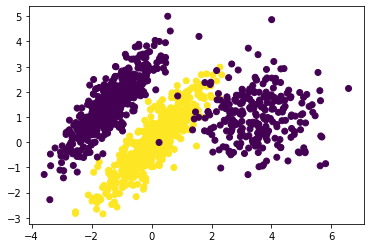

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y)

In [4]:
gm.fit(x)

GaussianMixture(n_components=3, n_init=10)

In [5]:
gm.weights_

array([0.20970929, 0.3902064 , 0.40008431])

In [6]:
gm.means_ # 각 클러스터의 위치

array([[ 3.39854326,  1.05926051],
       [ 0.0512132 ,  0.07512971],
       [-1.4076241 ,  1.42704927]])

In [7]:
gm.covariances_ # 각 클러스터의 공분산. 즉 퍼진 방향??

array([[[ 1.14901133, -0.03241901],
        [-0.03241901,  0.95484861]],

       [[ 0.68780591,  0.79597839],
        [ 0.79597839,  1.21232694]],

       [[ 0.63480459,  0.72971575],
        [ 0.72971575,  1.16110086]]])

In [8]:
gm.converged_ # 해당 알고리즘이 수렴했는가

True

In [9]:
gm.n_iter_ # 수렴했다면 몇 번째에 됐는가

4

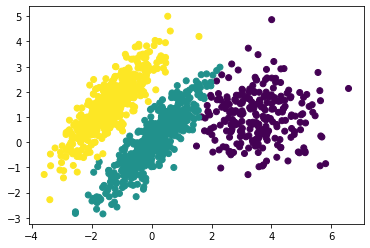

In [10]:
y_pred = gm.predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred)

In [11]:
gm.predict_proba(x)

array([[2.33107018e-02, 9.76688618e-01, 6.80230786e-07],
       [1.65481663e-02, 9.82774531e-01, 6.77302883e-04],
       [2.04358925e-06, 7.42085667e-05, 9.99923748e-01],
       ...,
       [9.99999578e-01, 4.21582331e-07, 2.17682412e-26],
       [1.00000000e+00, 4.93027253e-16, 1.50345348e-41],
       [1.00000000e+00, 2.19825399e-15, 8.24833927e-41]])

In [12]:
x_new = gm.sample(6)
x_new

(array([[ 4.28612507,  2.1712845 ],
        [ 2.42568701,  1.41090851],
        [-1.15143275, -0.8626101 ],
        [ 0.66292718,  0.23482356],
        [-0.51774325,  2.29973843],
        [-1.26955   ,  1.48721723]]),
 array([0, 0, 1, 1, 2, 2]))

가우시안 혼합 모델은 **생성 모델** 임. 즉 이 모델에서 새로운 샘플을 만들 수 있음.  
생성한 샘플은 인덱스 순으로 정렬되어 있음.  

In [13]:
gm.score_samples(x)

array([-2.60753797, -3.57117632, -3.32962239, ..., -3.51337454,
       -4.39800533, -3.80760349])

또한 **주어진 위치에서 모델의 밀도를 추정할 수 있음.** 이를 위해 **score_samples** 메서드를 이용 

In [14]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

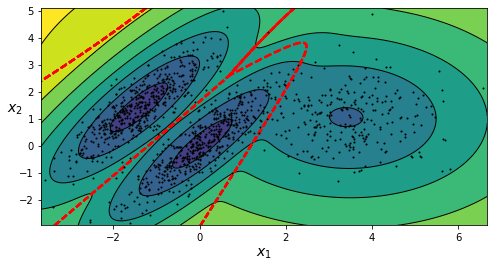

In [15]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, x)

plt.show()

확률 밀도를 등고선 형태로 표현한 모습

이 알고리즘이 훌륭한 솔루션을 찾은 것 같음. 물론 문제가 너무 쉬웠음. 또한 정확한 클러스터 개수를 입력했음.  
특성이나 클러스터가 많거나 샘플이 적을 때는 최적의 솔루션으로 수렴하기 어려움.  
이런 작업의 어려움을 줄이려면 알고리즘이 학습할 팔가미터 개수를 제한해야 함. 그 중 하나로 클러스터의 모양과 방향의 범위를 제한할 수 있음.  
공분산 행렬에 제약을 추가하여 그럴 수 있음. 사이킷런에선 **covariance_type** 매개변수로 조정  
- **spherical** : 모든 클러스터가 원형일 것이다. 지름은 다를 수 있다.   
- **diag** : 클러스터는 크기에 상관없이 어떤 타원형도 가능하다. 하지만 타원의 축은 좌표축과 나란해야 한다. (즉 공분산 행렬이 대각행렬)  
- **tied** : 모든 클러스터가 동일한 타원 모양, 크기 방향을 가진다. (즉 모든 클러스터는 동일한 공분산 행렬을 공유한다.)
  
기본값은 **full** 임. 모든 클러스터의 모양, 크기, 방향에 제약이 없다는 뜻.  
이 경우 특성 개수가 많으면 계산 복잡도때문에 적용하기 어려움 (n제곱 + n세제곱 꼴,,,)

---
## 가우시안 혼합을 이용한 이상치 탐지
**이상치 탐지(outlier detection)** 는 보통과 많이 다른 샘플을 감지하는 작업을 뜻함. 그 샘플을 **이상치** 라고 하고 보통 샘플은 **정상치** 라고 함. 이상치 탐지는 다양한 어플리케이션에 사용할 수 있음. 예를 들어 부정 거래 감지, 제조 결함 감지가 있음.  
또는 다른 모델을 훈련하기 전에 데이터셋에서 이상치를 제거하는 데 사용할 수 있음 (최종 모델의 성능을 크게 향상시킬 수 있음)  
원리는 간단함.  
> 가우시안 혼합 모델의 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있음.  
이렇게 하려면 사용할 **밀도 임곗값** 을 정해여 함. 

In [16]:
densities = gm.score_samples(x)
density_thr = np.percentile(densities, 4)
anomalies = x[densities < density_thr]

In [19]:
anomalies.shape, x.shape

((50, 2), (1250, 2))

1250개의 샘플중에 밀도가 4보다 낮은 50개의 샘플을 이상치로 탐지한 예시

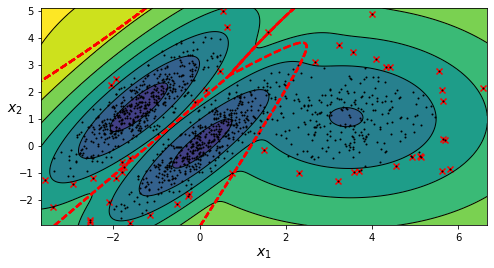

In [21]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, x)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x")

plt.show()

해당 이상치를 붉은색 x표시로 나타낸 모습

>이상치 탐지와 비슷한 작업으로 **특이치 탐지(novelty detection)** 이 있음.  
이 알고리즘은 이상치로 오염되지 않은 깨끗한 데이터셋에서 훈련한다는 다른점이 있음.

가우시안 혼합모델은 이상치를 모함해 모든 데이터에 맞추려고 함. 따라서 이상치가 너무 많으면 모델이 정상치를 바라보는 시각이 편향되고 이상치를 정상으로 잘못 판단할 수 있음. 이를 방지하기 위해선  
> 1. 먼저 한 모델을 훈련하고 가장 크게 벗어난 이상치를 제거함.  
2. 그 다음에 정제된 데이터셋에서 모델을 다시 훈련하기.  

---
## 가우시안 혼합의 클러스터 개수 선택하기
k-평균에서는 이너셔나 실루엣 점수를 이용해 적절한 클러스터 개수를 선택했음.  
가우시안 혼합에서는 그 지표를 사용할 수 없음. 그 지표들은 클러스터가 타원형이너가 크기가 다를 때 안정적이지 않기 때문.  
>대신에 **BIC(bayesian information criterion), AIC(Akaike information criterion)** 와 같은 이론적 정보 기준을 최소화하는 모델을 찾음.  

BIC와 AIC는 모두 학습할 파라미터가 많은(즉 클러스터가 많은) 모델에게 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더함.  
이 둘은 종종 동일한 모델을 선택하는데 선택이 다를 경우 BIC가 선택한 모델이 AIC가 선택한 모델보다 간단한(파라미터가 적은) 경향이 있음.  
하지만 데이터에는 아주 잘 맞지 않을 수 있다고 함(특히 대규모 데이터셋에서)

In [23]:
gm.bic(x)

8189.756836104972

In [24]:
gm.aic(x)

8102.531555989934

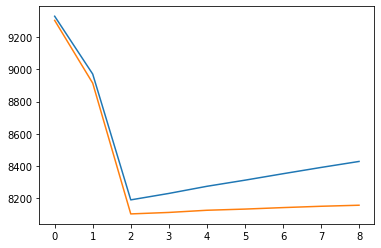

In [27]:
bic = []
aic = []

for k in range(1, 10):
    gm = GaussianMixture(n_components=k, n_init=10)
    gm.fit(x)
    bic.append(gm.bic(x))
    aic.append(gm.aic(x))

plt.plot(bic)
plt.plot(aic)
plt.show()

k=3일 때가 bic, aic 둘 다 가장 낮은 값을 가지므로 제일 좋아 보임.

---
## 베이즈 가우시안 혼합 모델
최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터 가중치를 0으로 만드는 **BayesianGaussianMixture** 클래스를 사용할 수 있음.  
클러스터 개수 **n_components** 를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정하고 작동. 
> 이 알고리즘은 자동으로 불필요한 클러스터를 제거해줌.

In [28]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(x)

BayesianGaussianMixture(n_components=10, n_init=10)

In [29]:
bgm.weights_

array([4.00990477e-01, 8.53705883e-04, 3.94181958e-01, 2.03894450e-01,
       7.21894495e-05, 6.56266117e-06, 5.96605561e-07, 5.42368692e-08,
       4.93062447e-09, 4.48238588e-10])

In [30]:
np.round(bgm.weights_, 2)

array([0.4 , 0.  , 0.39, 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

각 클러스터의 웨이트가 3개 빼고(정답 클러스터 갯수) 거의 0에 가까운 것을 볼 수 있음.

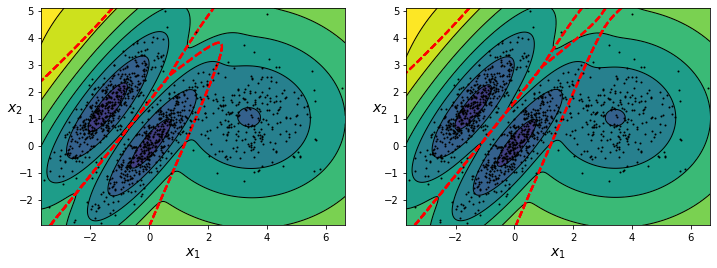

In [34]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(x)
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(x)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plot_gaussian_mixture(gm, x)

plt.subplot(1, 2, 2)
plot_gaussian_mixture(bgm, x)

plt.show()

기본 가우시안 혼합 모델과 베이지안 가우시안 혼합 모델의 비교  
데이터셋 자체가 워낙 명확해서 최종 결과물이 거의 같다.

c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


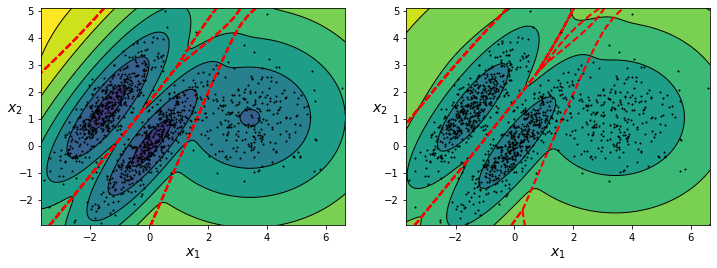

In [36]:
plt.figure(figsize=(12, 4))

bgm = BayesianGaussianMixture(n_components=10, n_init=10, weight_concentration_prior=0.01)
bgm.fit(x)
plt.subplot(1, 2, 1)
plot_gaussian_mixture(bgm, x)

bgm = BayesianGaussianMixture(n_components=10, n_init=10, weight_concentration_prior=10000)
bgm.fit(x)
plt.subplot(1, 2, 2)
plot_gaussian_mixture(bgm, x)

plt.show()

**weight_concentration_prior** 변수를 조정한 모습  
해당 변수로 클러스터가 적을 것인지(낮은 농도), 아니면 풍부할 것인지(높은 농도) **사전 믿음** 을 설정할 수 있음.  
하지만 데이터가 많을수록 사전 믿음은 중요하지 않음. 큰 차이가 나려면 이렇게 사전 믿음이 매우 강하고 데이터는 적어야 함.
---

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=1000, noise=0.05)

In [39]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, weight_concentration_prior=10000)
bgm.fit(x)

BayesianGaussianMixture(n_components=10, n_init=10,
                        weight_concentration_prior=10000)

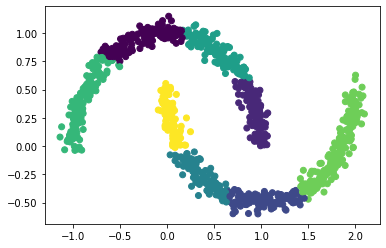

In [41]:
y_pred = bgm.predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred)

가우시안 혼합 모델은 타원형 클러스터에 잘 작동함.  
하지만 다른 모양을 가진 데이터셋에 훈련하면 나쁜 결과를 얻게 됨.  
그림과 같이 하나의 클러스터로 구분하지 못함. 이 알고리즘이 필사적으로 타원을 찾기 때문  

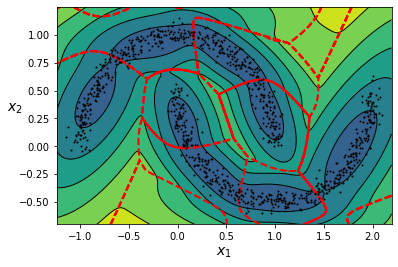

In [42]:
plot_gaussian_mixture(bgm, x)

다행히 밀도 추정은 나쁘지 않아서 이상치 감지에는 쓸 수 있을 듯.

In [43]:
densities = bgm.score_samples(x)
density_thr = np.percentile(densities, 4)
anomalies = x[densities < density_thr]

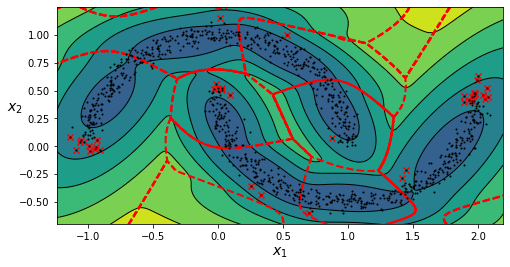

In [44]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(bgm, x)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x")

plt.show()